In [ ]:
from skimage import io, data
import scipy.signal
import numpy as np
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import pyplot as plt

In [ ]:
im= plt.imread('kbr.jpg')
im= im.astype('float')
im /= 255.


In [ ]:
t = 1 - np.abs(np.linspace(-1, 1, 21))
kernel = t.reshape(21, 1) * t.reshape(1, 21)
kernel /= kernel.sum()

In [ ]:
r = scipy.signal.convolve2d(im[:,:,0], kernel, mode='same')
g = scipy.signal.convolve2d(im[:,:,1], kernel, mode='same')
b = scipy.signal.convolve2d(im[:,:,2], kernel, mode='same')

In [ ]:
im_out = np.dstack([r, g, b])
im_out = (im_out * 255).astype(np.uint8) 

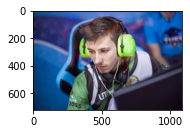

In [ ]:
plt.subplot(2,1,1)
plt.imshow(im)

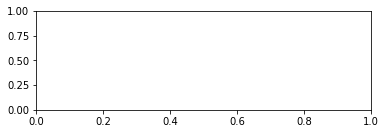

In [ ]:
plt.subplot(2,1,2)

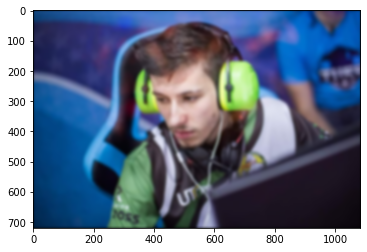

In [ ]:
plt.imshow(im_out) #como pode-se ver o resultado do filtro passa baixa é a imagem borrada


In [ ]:
plt.show()

In [ ]:
imout2 =im_out[[0,100],[0,100]]
res = resize(imout2, (10, 10))

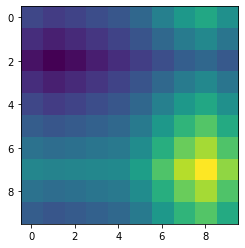

In [ ]:
plt.imshow(res)

In [ ]:
im= plt.imread('kbr.jpg')
im= im.astype('float')
im /= 255.
imout3=scipy.ndimage.median_filter(im, size=(2,2,2), mode='reflect', cval=0.0, origin=0)

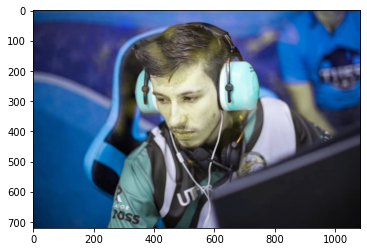

In [ ]:
plt.imshow(imout3) #o filtro reflect deixou as cores mais proximas umas das outras
#a transição das mesmas é mais suave

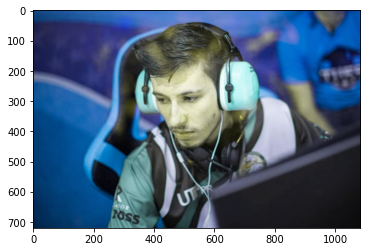

In [ ]:
imout3=scipy.ndimage.median_filter(im, size=(2,2,2), mode='constant', cval=0.0, origin=0)
plt.imshow(imout3) #os valores das bordas ficam constantes

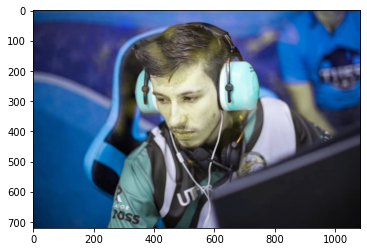

In [ ]:
imout3=scipy.ndimage.median_filter(im, size=(2,2,2), mode='nearest', cval=0.0, origin=0)
plt.imshow(imout3) #replica a cor do ultimo pixel

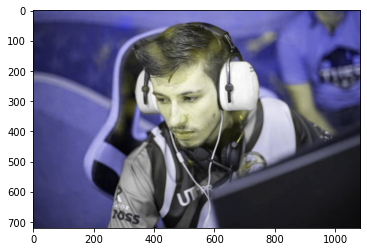

In [ ]:
imout3=scipy.ndimage.median_filter(im, size=(2,2,2), mode='mirror', cval=0.0, origin=0)
plt.imshow(imout3) #replica a cor do centro para as bordas

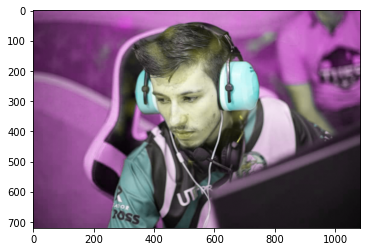

In [ ]:
imout3=scipy.ndimage.median_filter(im, size=(2,2,2), mode='wrap', cval=0.0, origin=0)
plt.imshow(imout3) #faz um "contraste" de cores

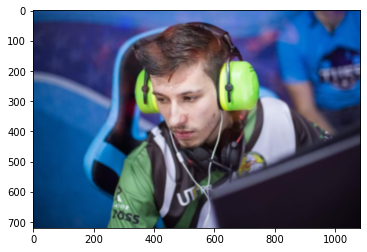

In [ ]:
gauss = cv2.GaussianBlur(im, (7,7), 0)
plt.imshow(gauss)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


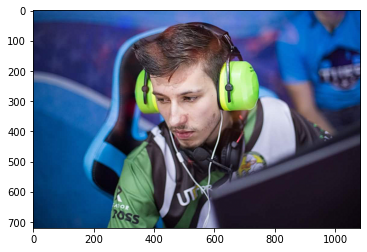

In [ ]:
unsharp_image = cv2.addWeighted(im, 2, gauss, -1, 0)
plt.imshow(unsharp_image)
#a imagem fica muito mais nitida